<a href="https://colab.research.google.com/github/heejininku/2025spring/blob/main/class_2025_spring_0509_3_%ED%95%84%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn numpy

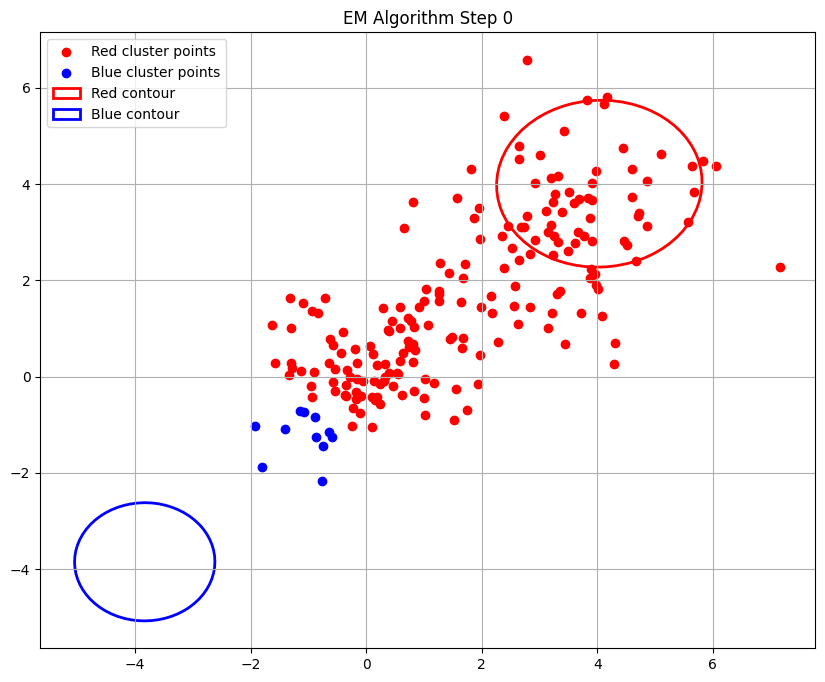

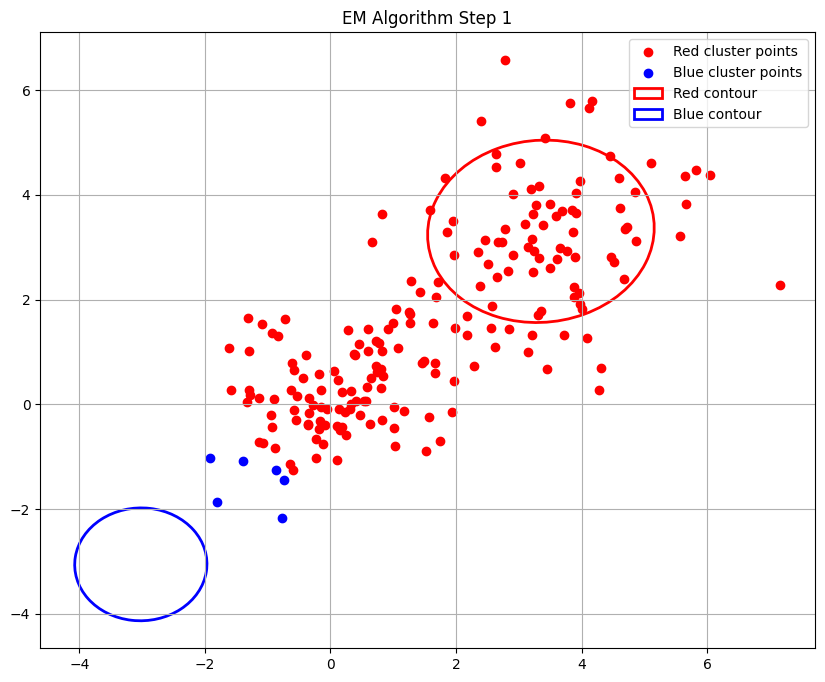

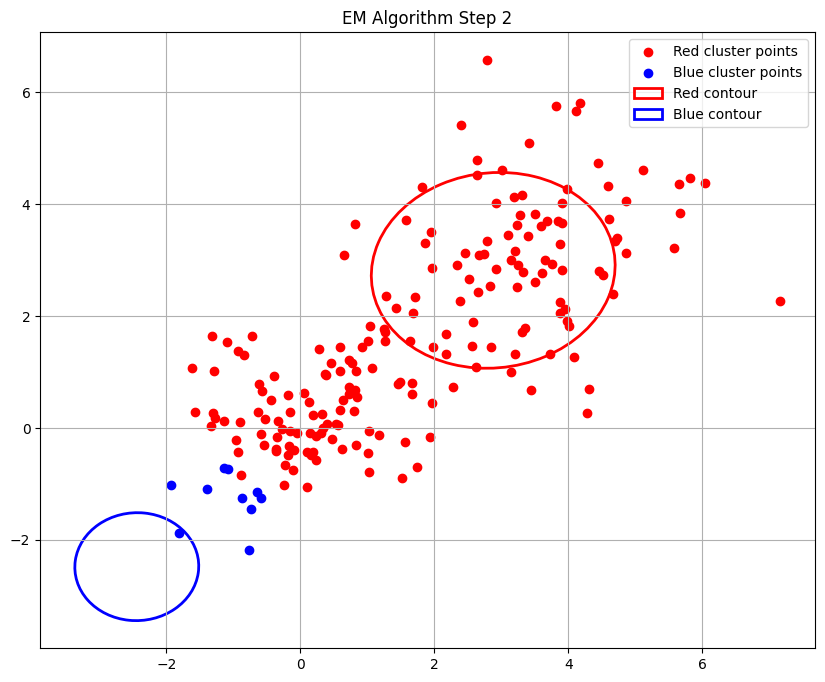

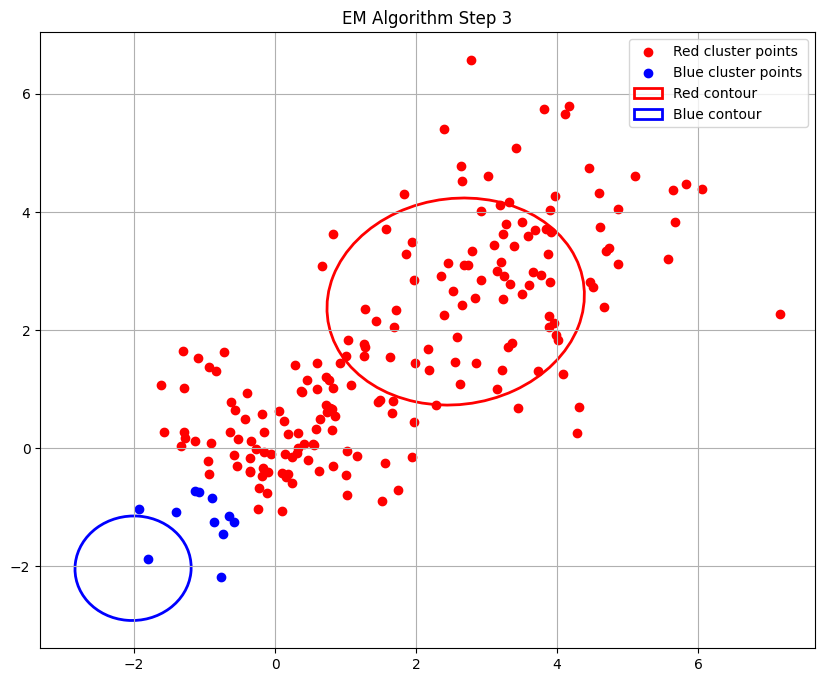

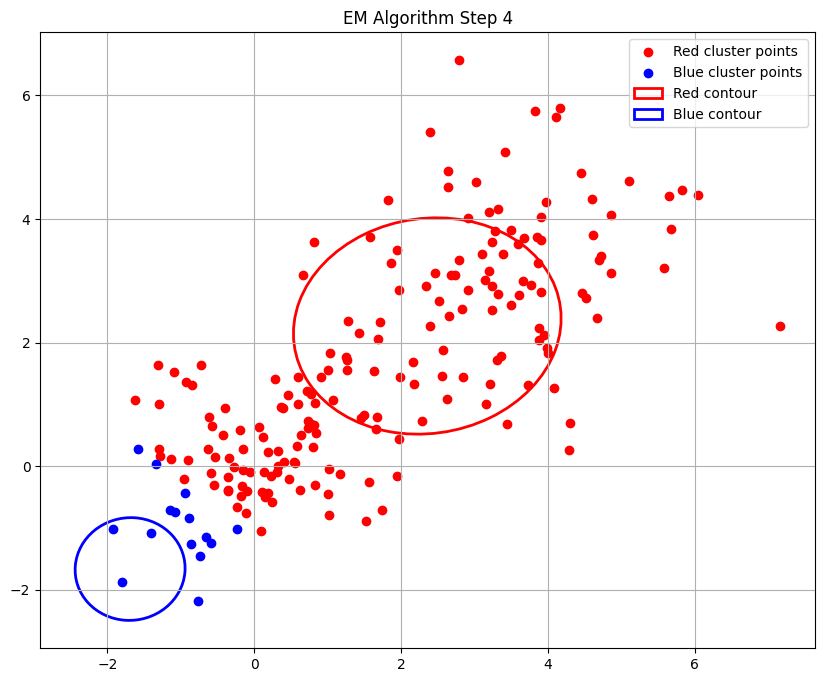

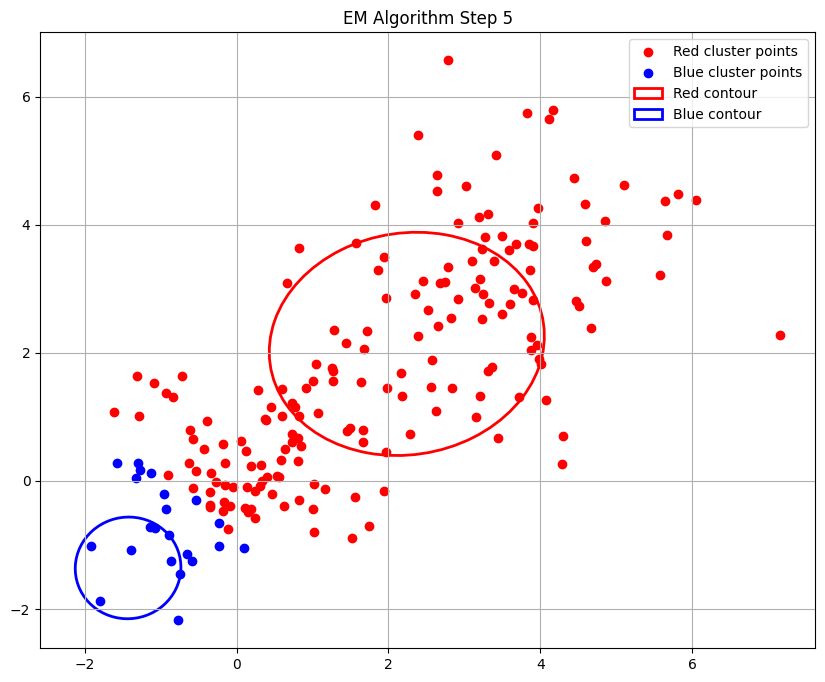

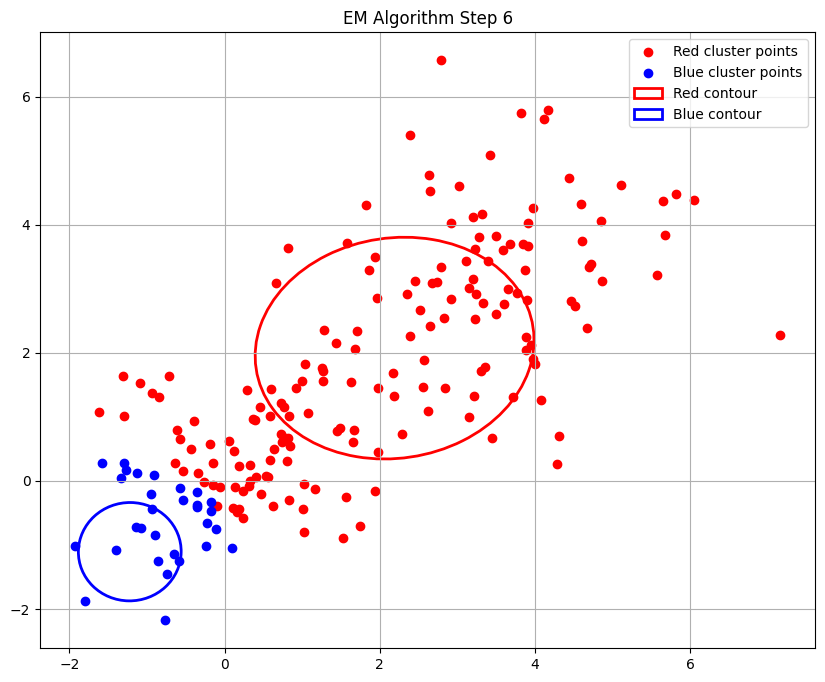

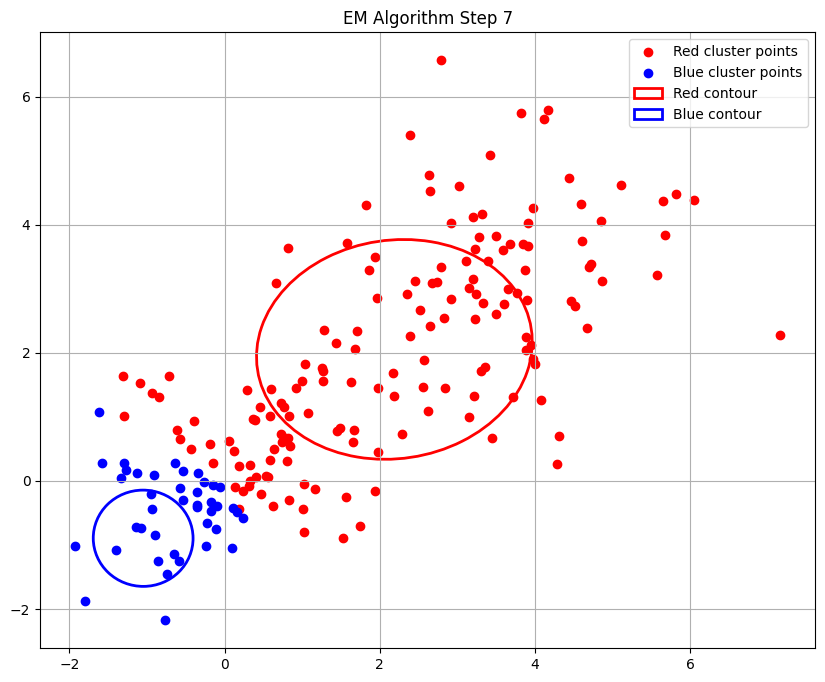

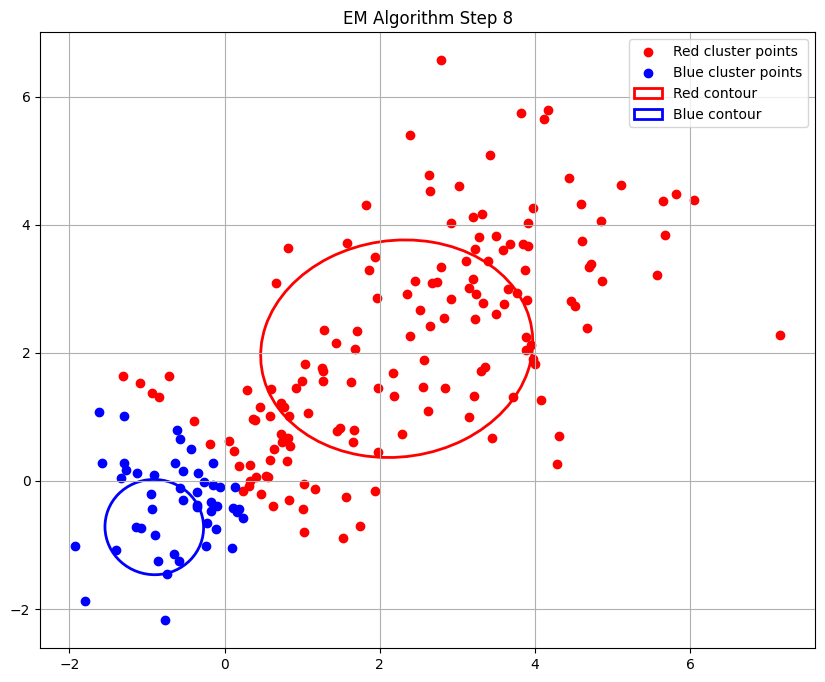

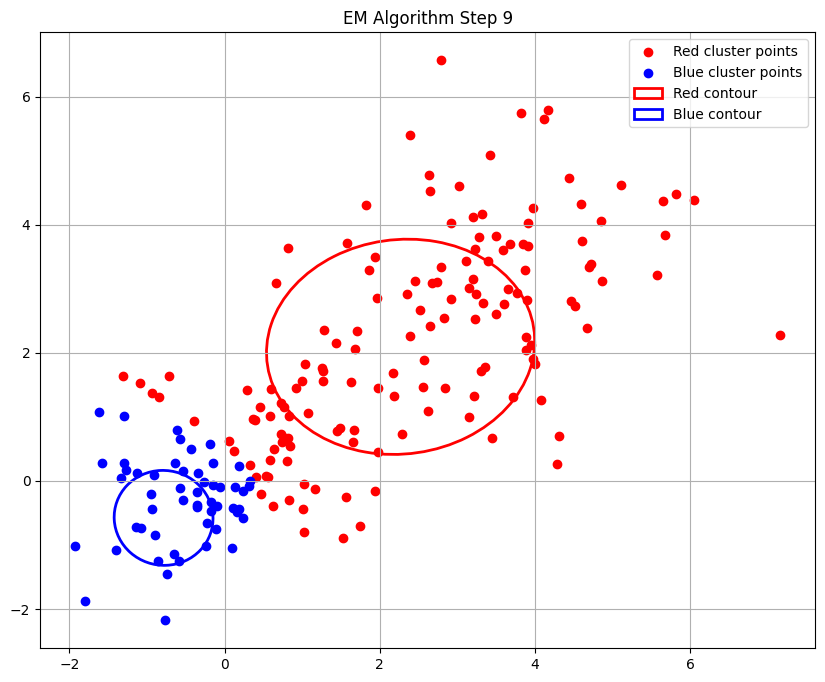

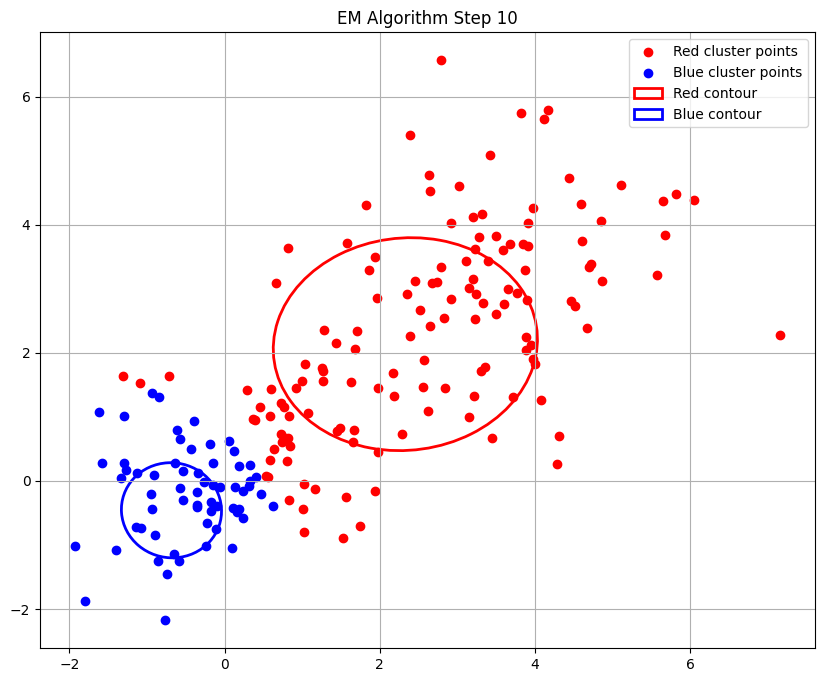

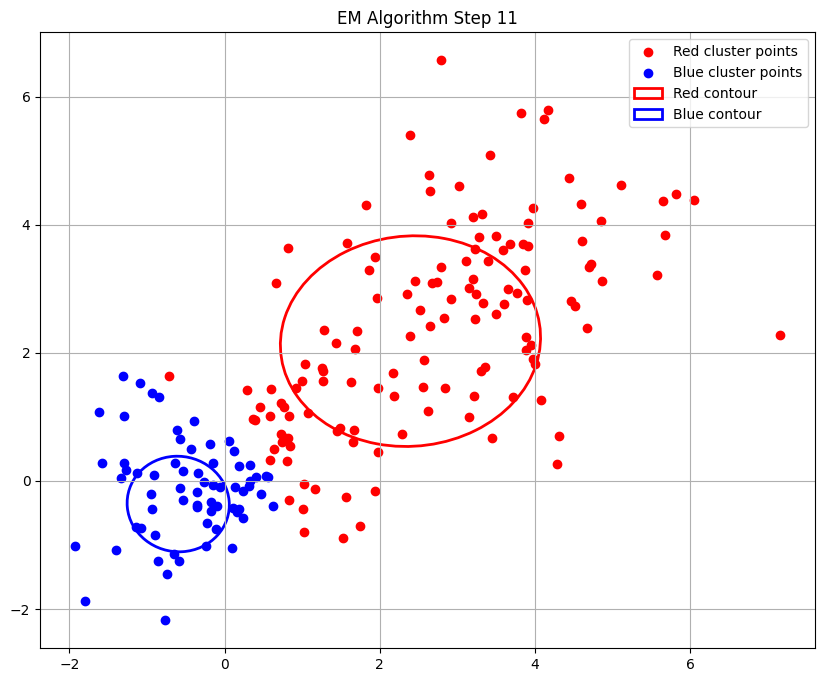

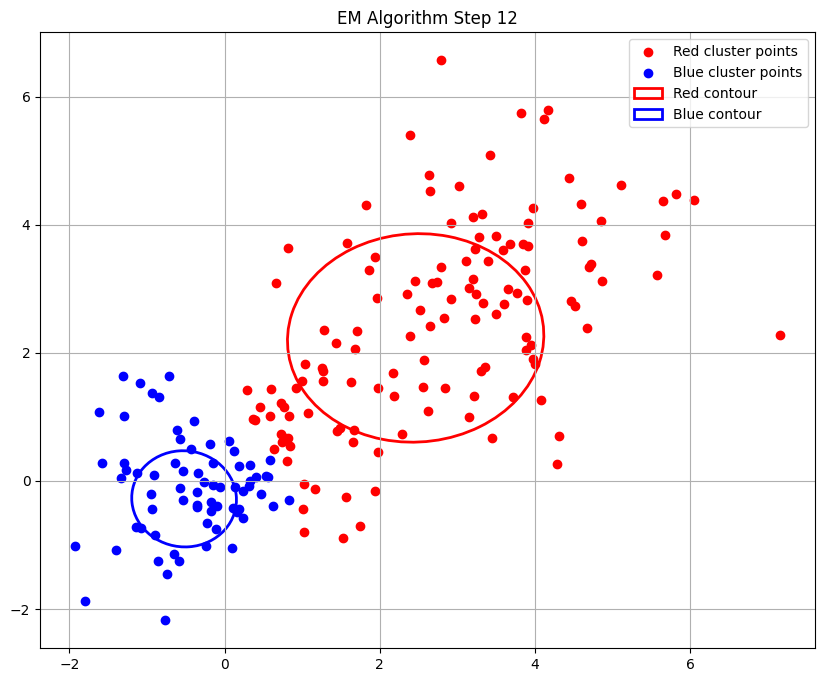

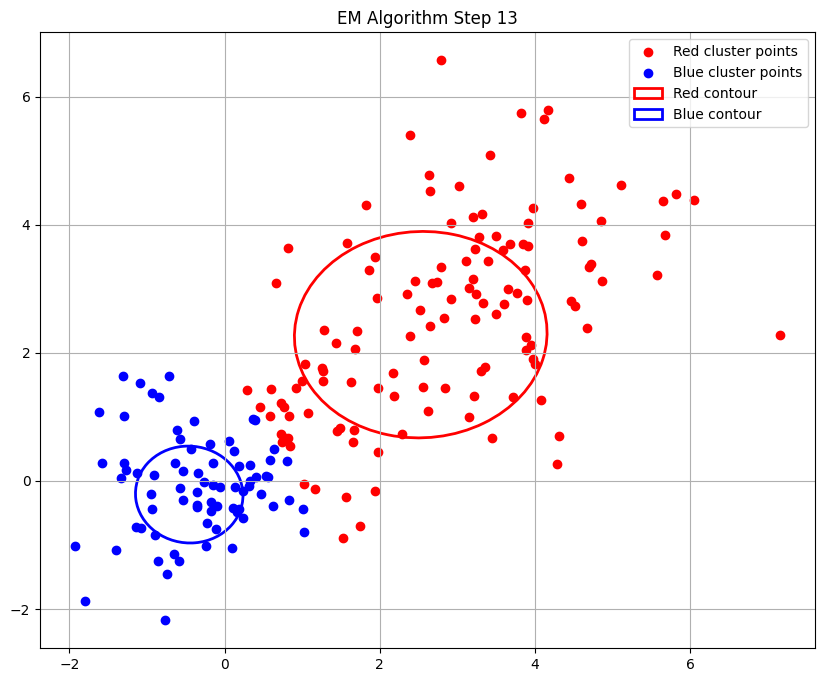

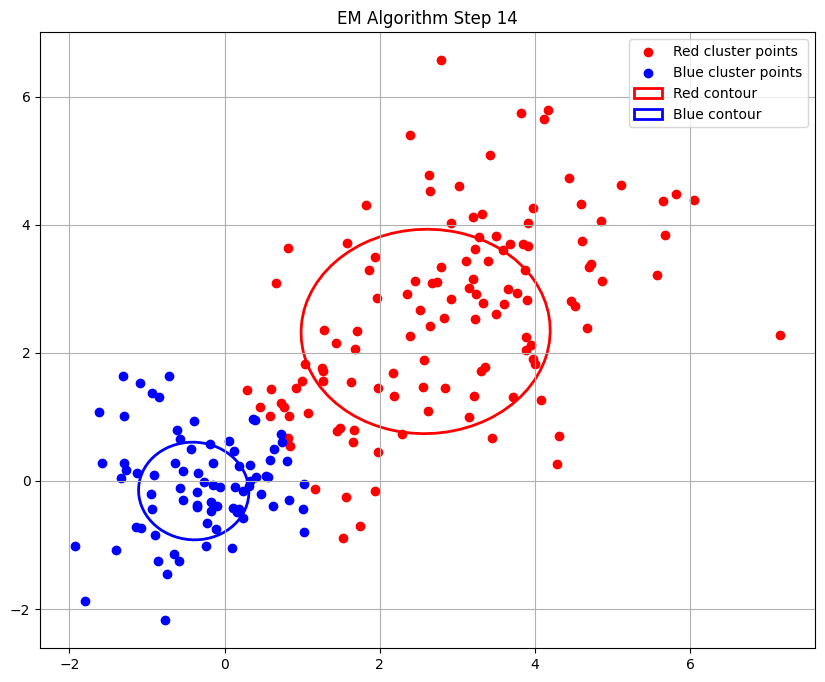

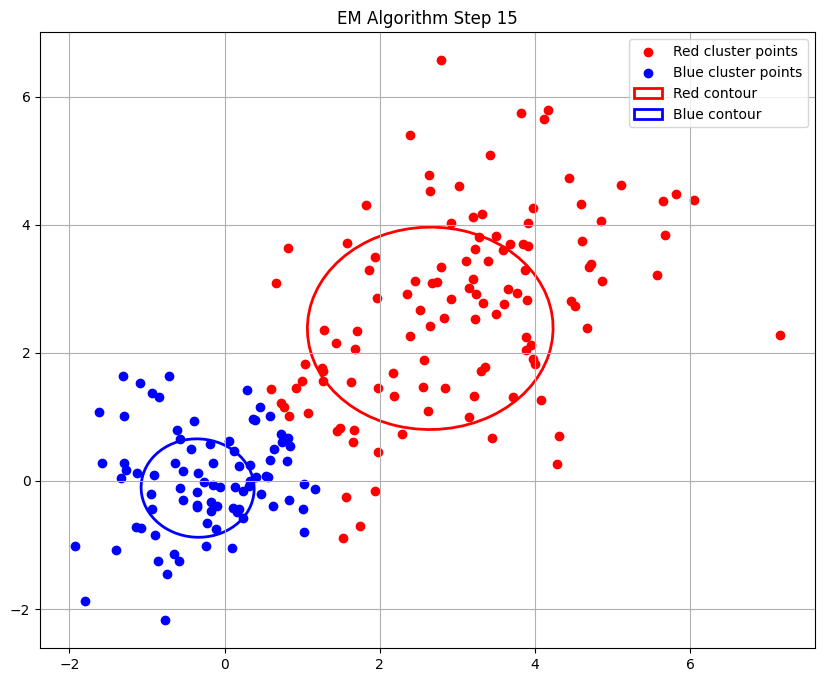

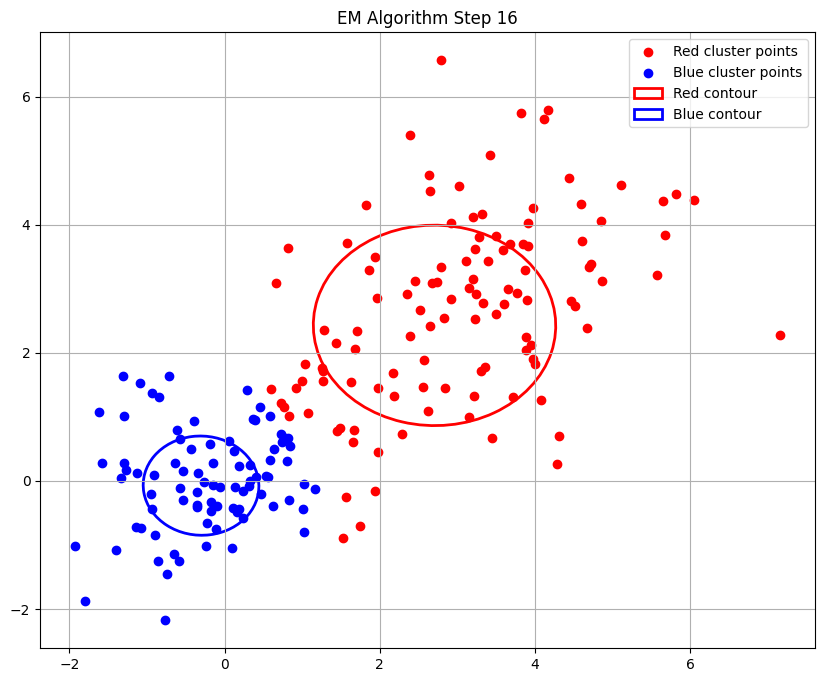

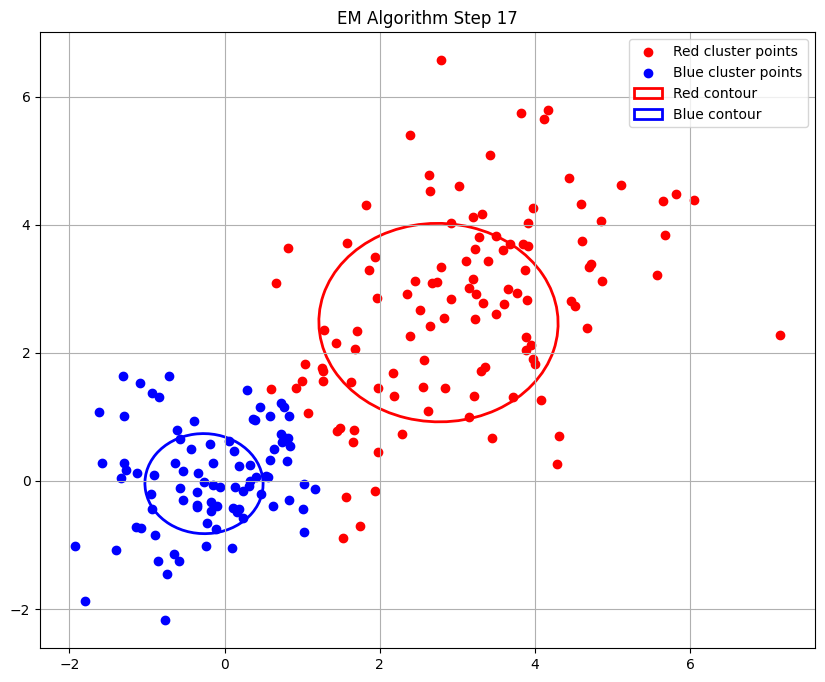

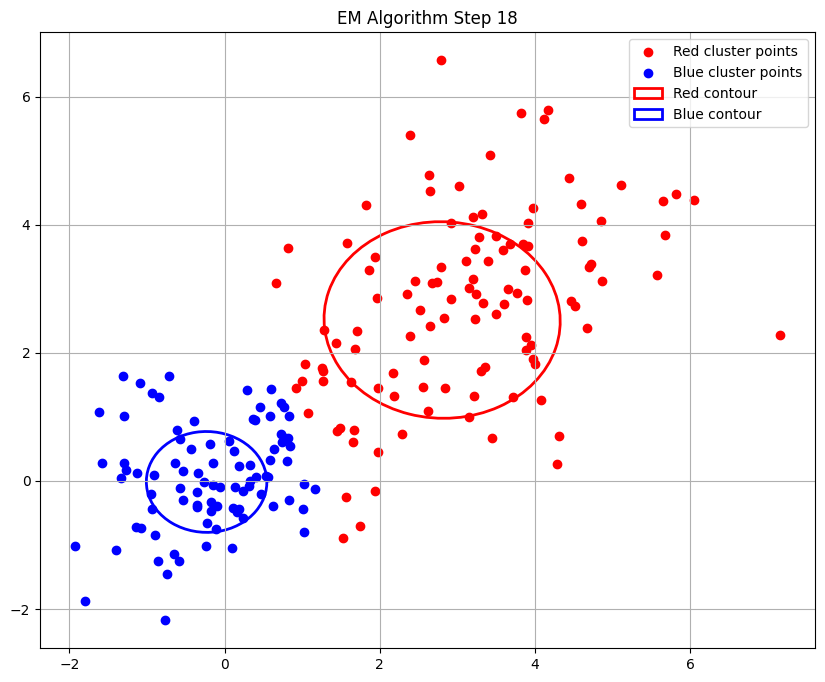

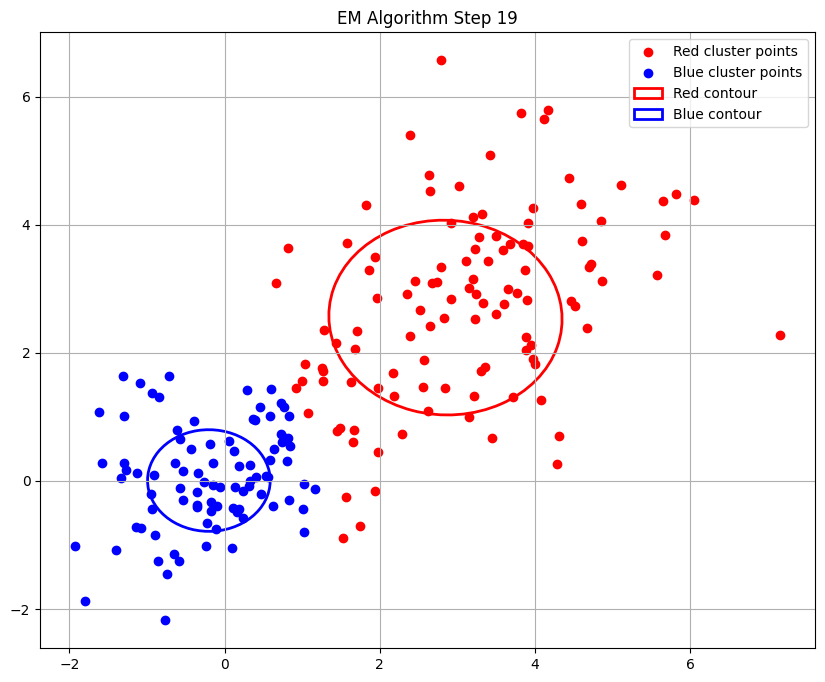

In [ ]:
import numpy as np
from scipy import stats
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

# Function to plot the current state of the EM algorithm
def plot_em_2d(red_mean, red_cov, blue_mean, blue_cov, red_dots, blue_dots, step):
    plt.figure(figsize=(10, 8))

    # Plot the points
    plt.scatter(red_dots[:, 0], red_dots[:, 1], c='red', label='Red cluster points')
    plt.scatter(blue_dots[:, 0], blue_dots[:, 1], c='blue', label='Blue cluster points')

    # Plot the Gaussian distributions for red cluster
    red_ellipse = Ellipse(
        xy=red_mean,
        width=2 * np.sqrt(red_cov[0, 0]),
        height=2 * np.sqrt(red_cov[1, 1]),
        angle=np.rad2deg(np.arctan2(red_cov[1, 0], red_cov[0, 0])),
        edgecolor='red',
        fc='None',
        lw=2,
        label='Red contour'
    )
    plt.gca().add_patch(red_ellipse)

    # Plot the Gaussian distributions for blue cluster
    blue_ellipse = Ellipse(
        xy=blue_mean,
        width=2 * np.sqrt(blue_cov[0, 0]),
        height=2 * np.sqrt(blue_cov[1, 1]),
        angle=np.rad2deg(np.arctan2(blue_cov[1, 0], blue_cov[0, 0])),
        edgecolor='blue',
        fc='None',
        lw=2,
        label='Blue contour'
    )
    plt.gca().add_patch(blue_ellipse)

    plt.title(f'EM Algorithm Step {step}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate 2D data
np.random.seed(111)
red_mean_2d = np.array([0, 0])
blue_mean_2d = np.array([3, 3])  # Closer clusters for more overlap
red_cov_2d = np.array([[0.8, 0.2], [0.2, 0.8]])
blue_cov_2d = np.array([[1.5, 0.3], [0.3, 1.5]])

red_dots_2d = np.random.multivariate_normal(red_mean_2d, red_cov_2d, 100)
blue_dots_2d = np.random.multivariate_normal(blue_mean_2d, blue_cov_2d, 100)
purple_dots_2d = np.vstack((red_dots_2d, blue_dots_2d))

# Initial guesses
red_mean_guess_2d = np.array([5, 5])  # Far from true mean
blue_mean_guess_2d = np.array([-5, -5])  # Far from true mean
red_cov_guess_2d = np.array([[3, 0.5], [0.5, 3]])  # Random covariance
blue_cov_guess_2d = np.array([[2, -0.3], [-0.3, 2]])  # Random covariance

# Learning rate
learning_rate = 0.3

# EM algorithm for 2D data
for step in range(20):  # Run for fewer steps to observe evolution
    # E-step: calculate responsibilities
    red_likelihoods = stats.multivariate_normal.pdf(purple_dots_2d, mean=red_mean_guess_2d, cov=red_cov_guess_2d)
    blue_likelihoods = stats.multivariate_normal.pdf(purple_dots_2d, mean=blue_mean_guess_2d, cov=blue_cov_guess_2d)
    normalizing_constant = red_likelihoods + blue_likelihoods
    red_weights = red_likelihoods / normalizing_constant
    blue_weights = blue_likelihoods / normalizing_constant

    # Assign points to clusters based on maximum responsibility
    red_cluster = purple_dots_2d[red_weights > blue_weights]
    blue_cluster = purple_dots_2d[blue_weights >= red_weights]

    # M-step: update parameters with learning rate
    new_red_mean = np.sum(purple_dots_2d * red_weights[:, np.newaxis], axis=0) / np.sum(red_weights)
    new_blue_mean = np.sum(purple_dots_2d * blue_weights[:, np.newaxis], axis=0) / np.sum(blue_weights)
    new_red_cov = np.cov(purple_dots_2d.T, aweights=red_weights)
    new_blue_cov = np.cov(purple_dots_2d.T, aweights=blue_weights)

    red_mean_guess_2d = (1 - learning_rate) * red_mean_guess_2d + learning_rate * new_red_mean
    blue_mean_guess_2d = (1 - learning_rate) * blue_mean_guess_2d + learning_rate * new_blue_mean
    red_cov_guess_2d = (1 - learning_rate) * red_cov_guess_2d + learning_rate * new_red_cov
    blue_cov_guess_2d = (1 - learning_rate) * blue_cov_guess_2d + learning_rate * new_blue_cov

    # Plot the current state
    plot_em_2d(red_mean_guess_2d, red_cov_guess_2d, blue_mean_guess_2d, blue_cov_guess_2d, red_cluster, blue_cluster, step)


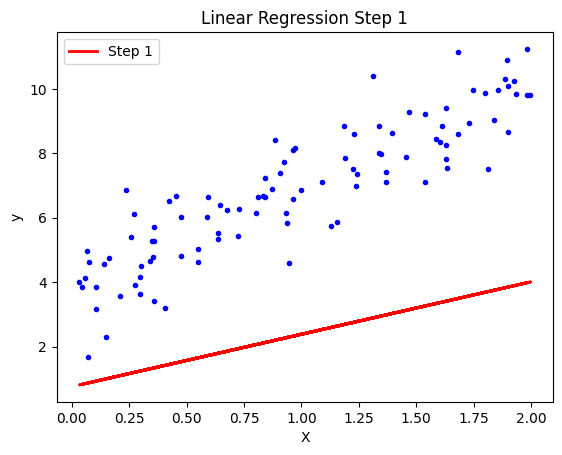

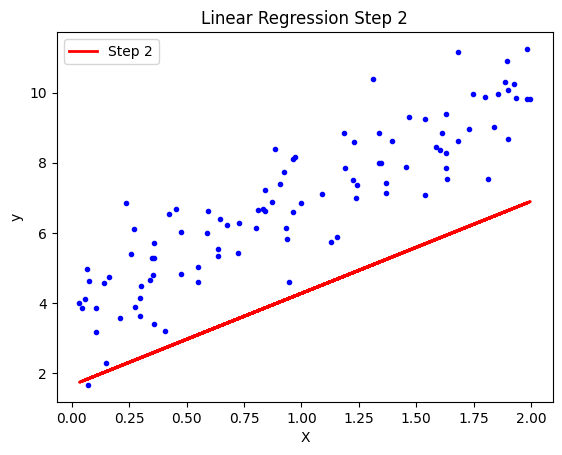

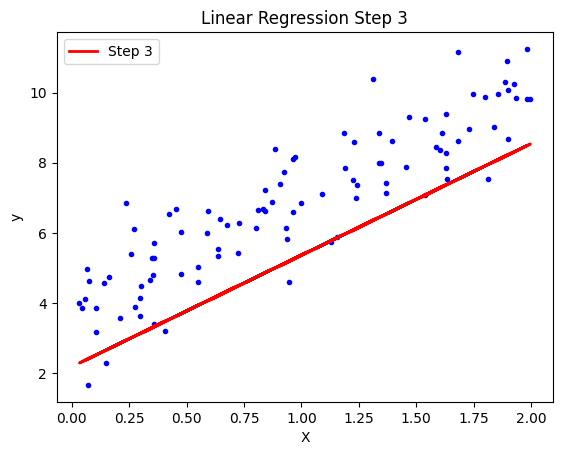

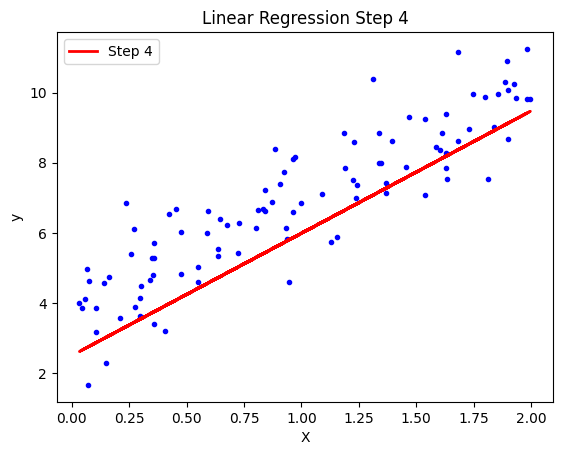

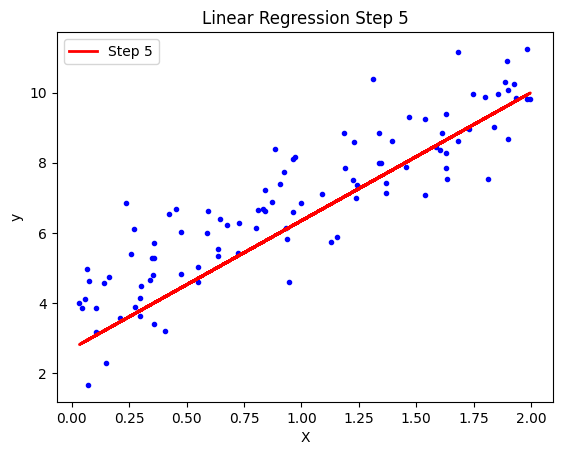

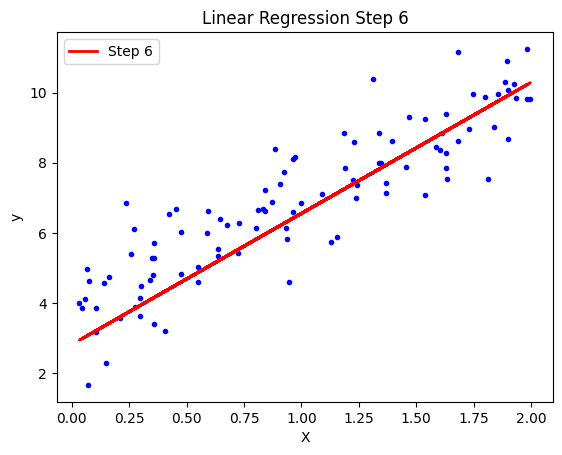

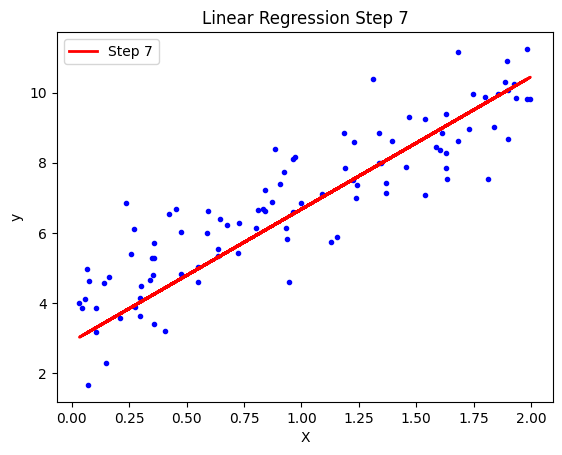

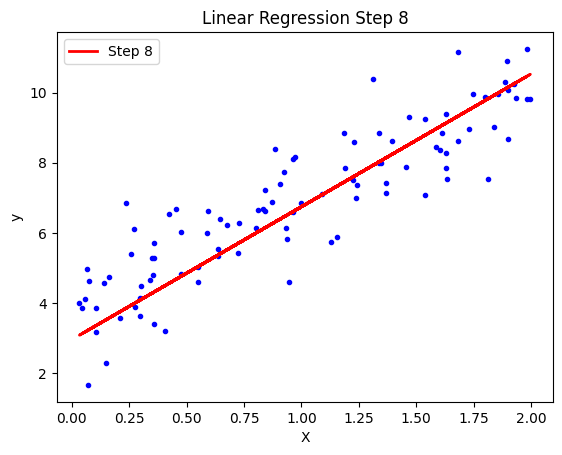

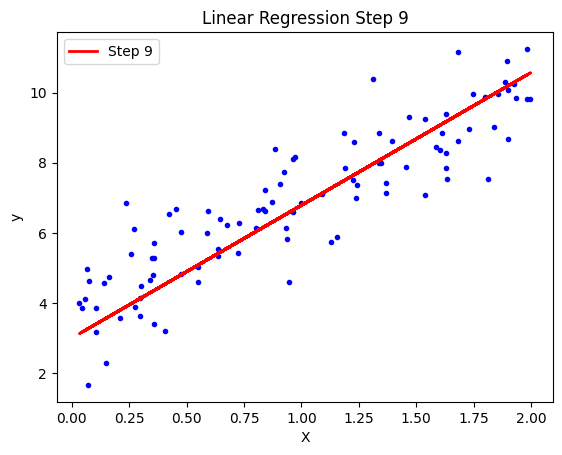

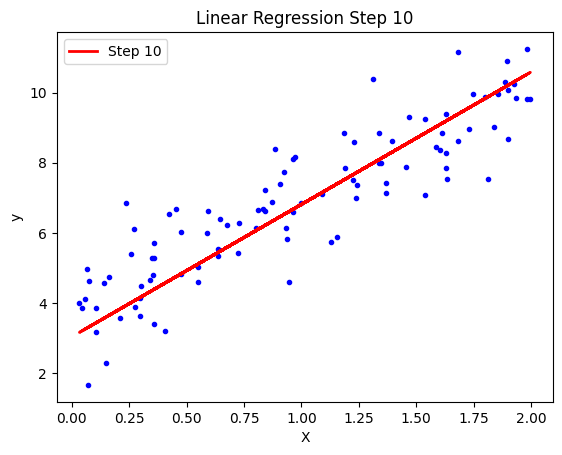

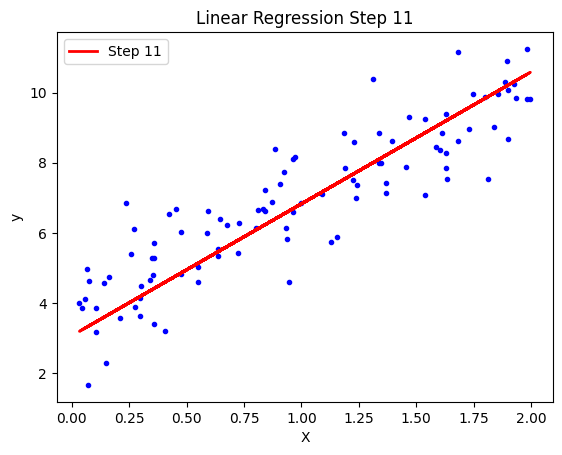

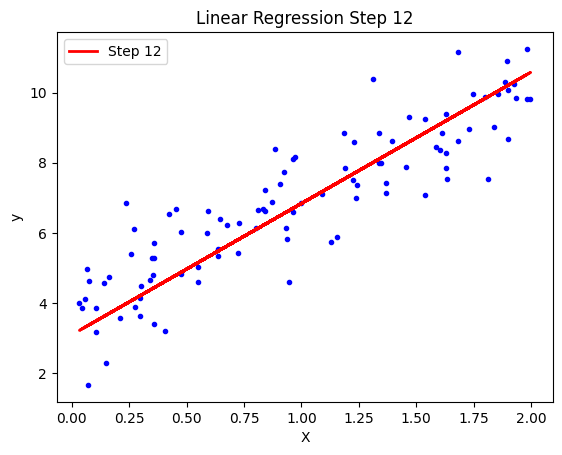

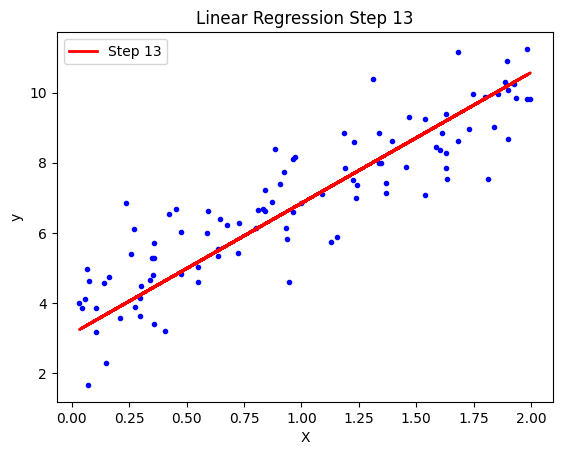

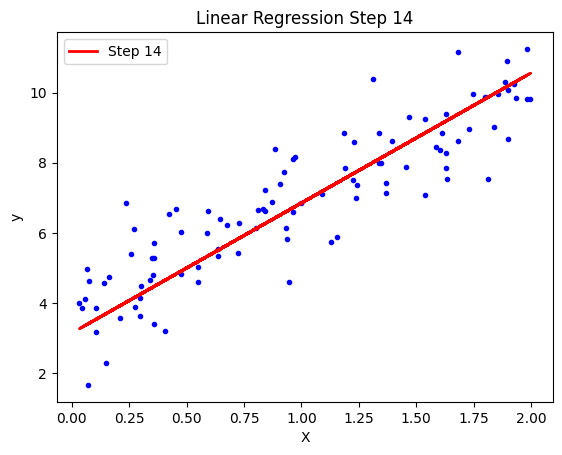

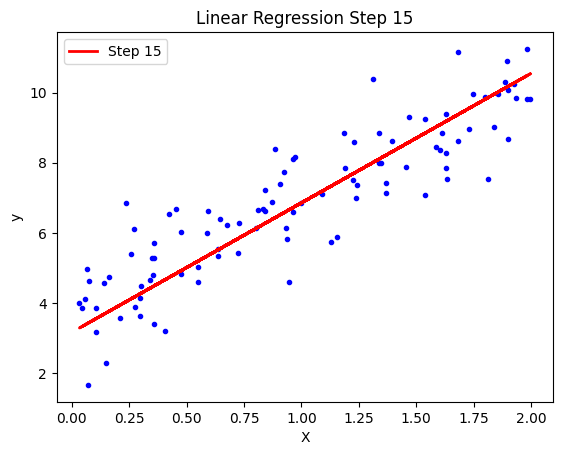

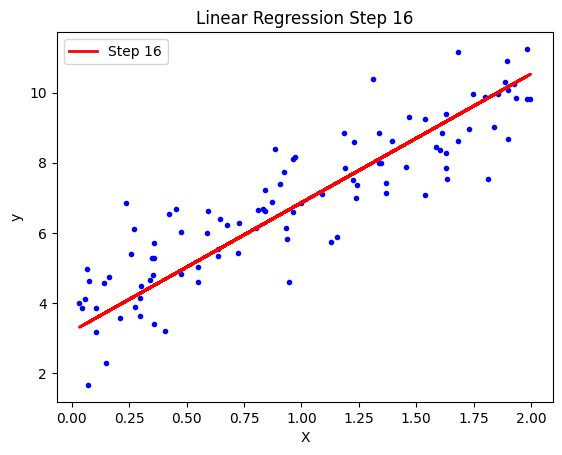

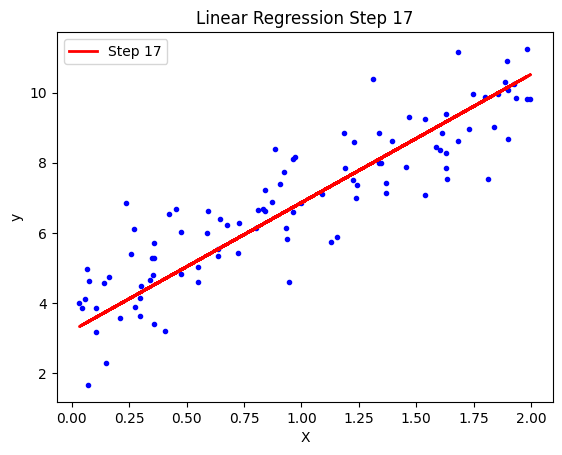

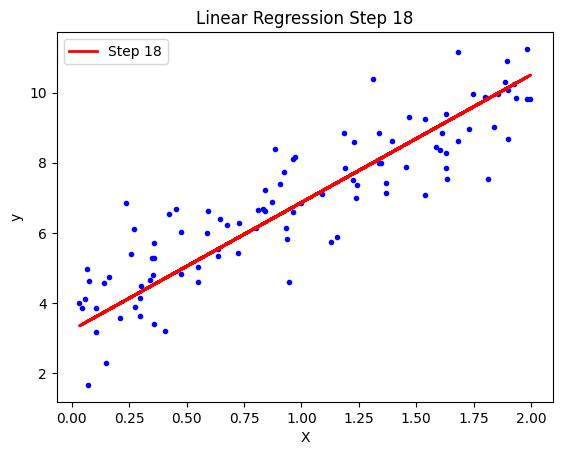

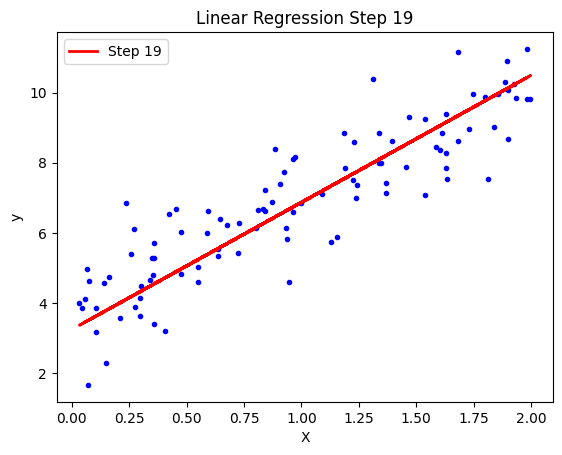

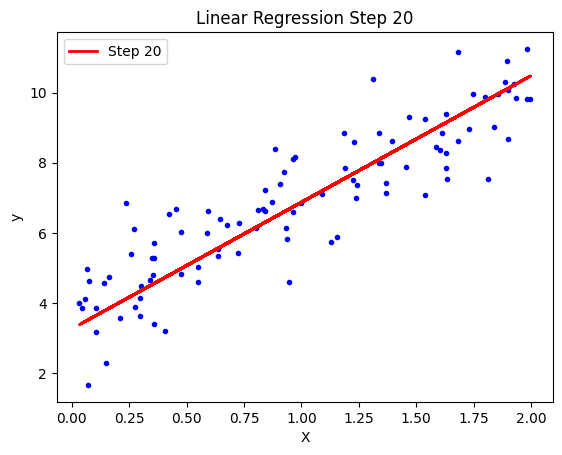

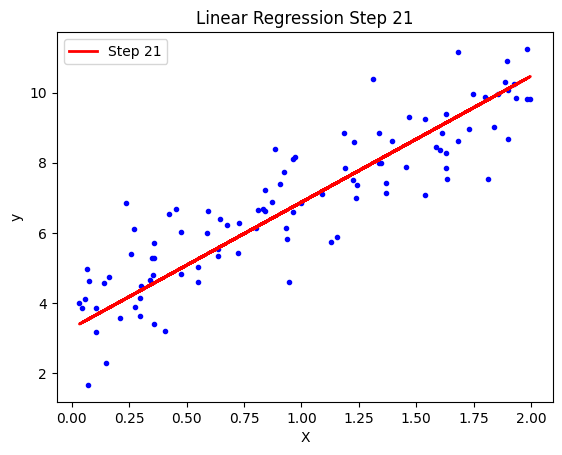

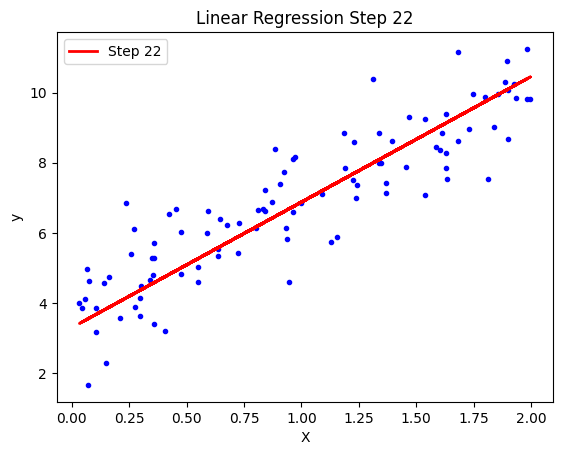

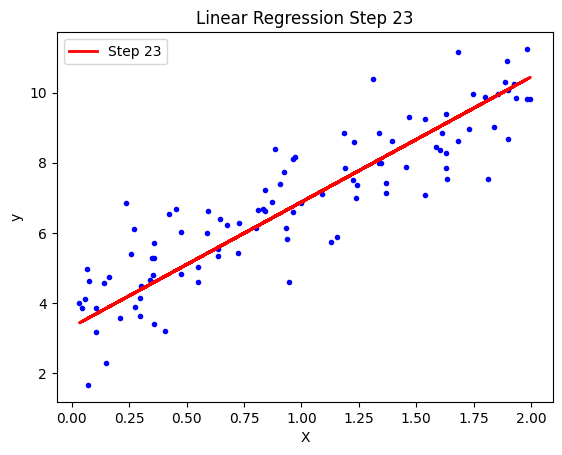

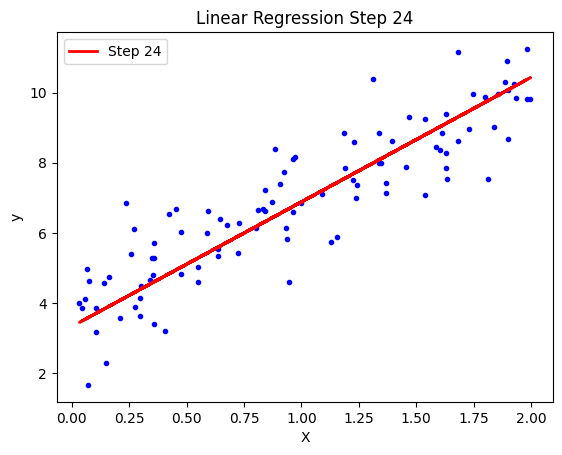

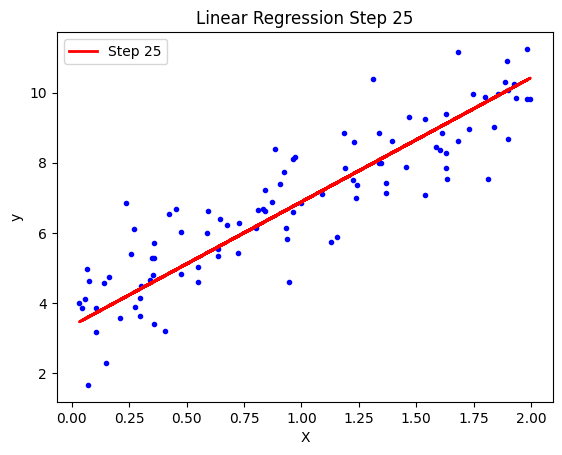

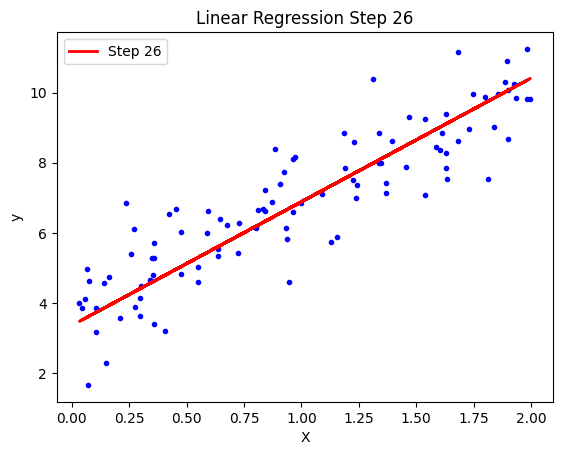

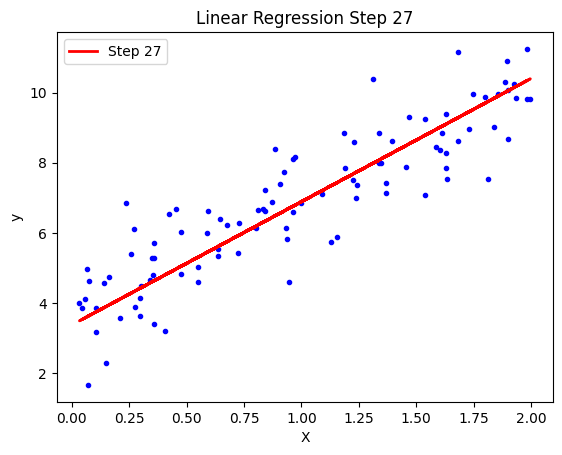

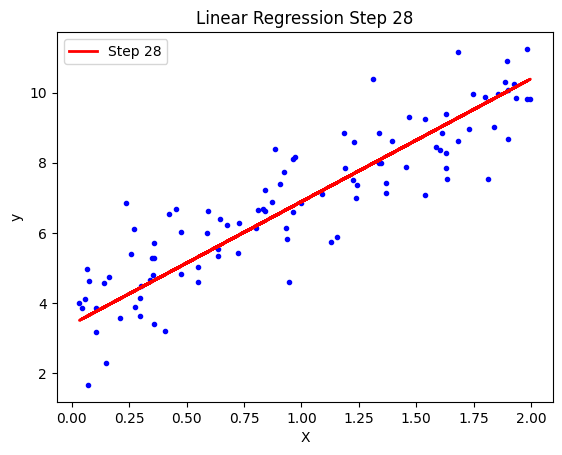

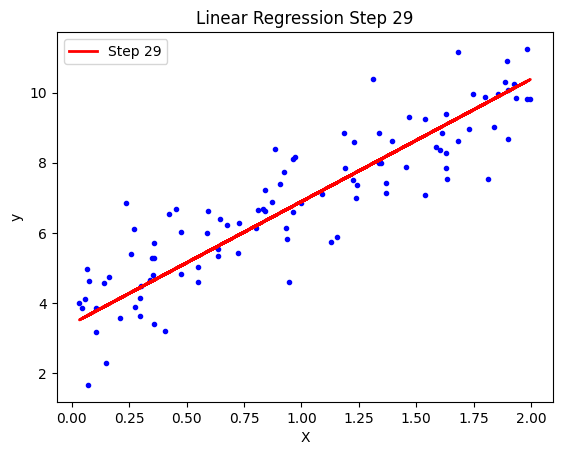

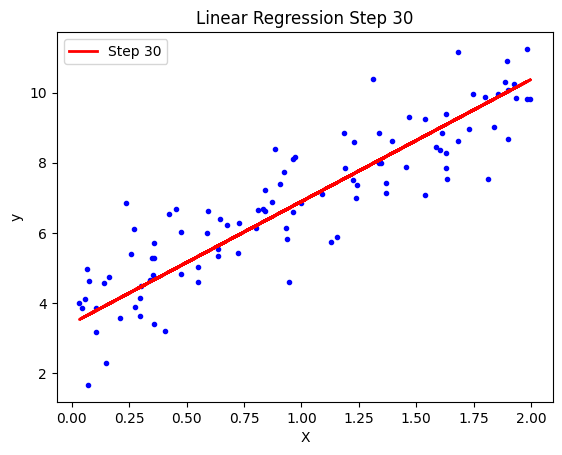

In [ ]:
# 2D visualization of LR algorithm
# Generate sample data
np.random.seed(111)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (intercept) to X
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)

# Learning rate
learning_rate = 0.1

# Number of iterations
n_iterations = 30

# Perform gradient descent
for iteration in range(n_iterations):
	gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
	theta = theta - learning_rate * gradients

	# Plot the data and the regression line
	plt.plot(X, y, "b.")
	plt.plot(X, X_b.dot(theta), "r-", linewidth=2, label=f"Step {iteration+1}")
	plt.xlabel("X")
	plt.ylabel("y")
	plt.title(f"Linear Regression Step {iteration+1}")
	plt.legend()
	plt.show()